Day 1 retention: 100.0%
Day 2 retention: 51.12%
Day 3 retention: 40.95%
Day 4 retention: 35.96%
Day 5 retention: 32.8%
Day 6 retention: 30.54%
Day 7 retention: 28.81%


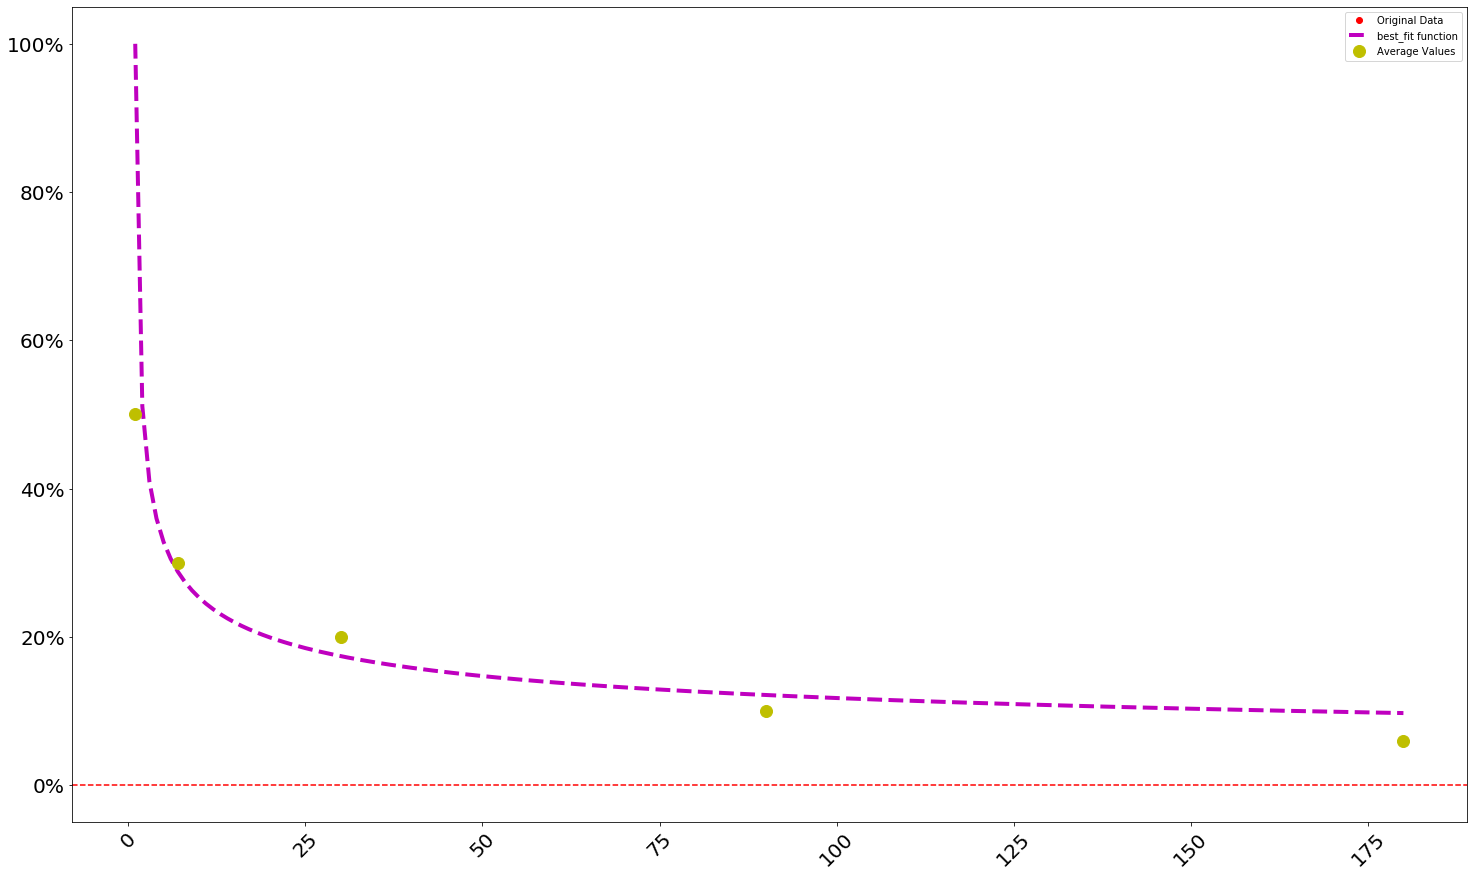

In [15]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.patches import Polygon
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
import seaborn as sns
import matplotlib.ticker as mtick
import re
import matplotlib.font_manager as mfm
from matplotlib.font_manager import FontProperties
import numbers
import math
import numpy as np
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import datetime as dt
from datetime import date, timedelta
import pandas as pd

##############
# RETENTION PROFILE EXAMPLE
##############

import theseus_growth as th
th = th.theseus()

days = [ 1, 7, 30, 90, 180 ]
retention_points_by_day = [ 50, 30, 20, 10, 6 ]

general = th.create_profile( days = days, retention_values = retention_points_by_day )

for x_val in [ x+1 for x in range( 7 ) ]:
    print( "Day " + str( x_val ) + " retention: " + str( round( general[ 'retention_projection' ][ 1 ][ x_val - 1 ], 2) ) + "%" )

th.plot_retention( general )



                1    2    3    4    5    6    7
cohort_date                                    
1            1000  511  409  359  328  305  288


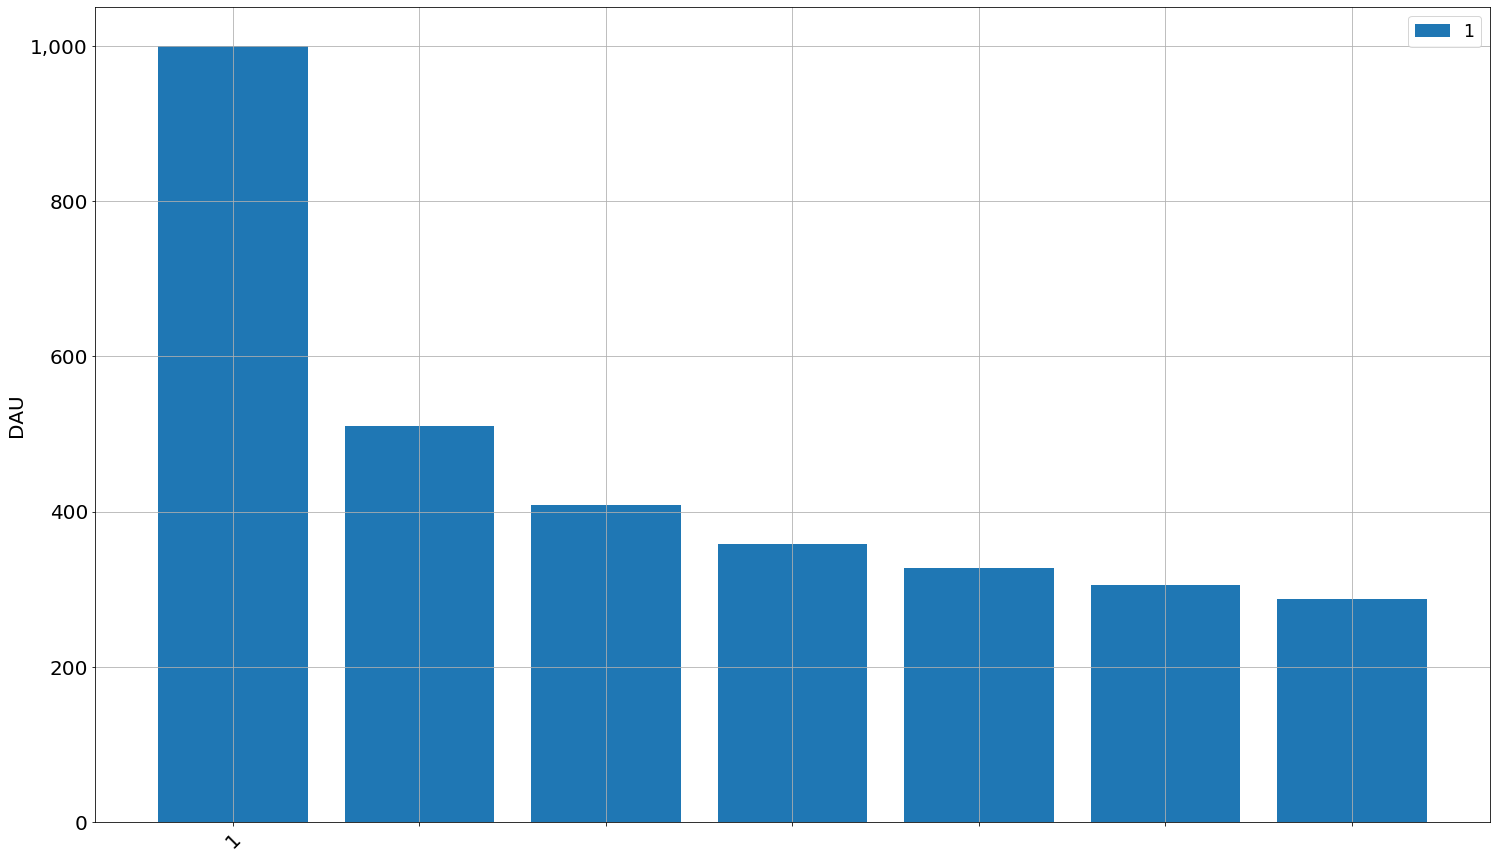

In [10]:
##############
# SINGLE COHORT PROGRESSION EXAMPLE
##############

cohorts = [1000]

DAU = th.project_cohorted_DAU( profile = general, periods = 7, cohorts = cohorts, start_date = 1 )

print( DAU )

th.plot_forward_DAU_stacked( forward_DAU = DAU, 
    forward_DAU_labels = list( DAU.index ), 
    forward_DAU_dates = list( DAU.columns ), 
)

                1     2     3     4     5     6     7
cohort_date                                          
1            1000   511   409   359   328   305   288
2               0  1000   511   409   359   328   305
3               0     0  1000   511   409   359   328
4               0     0     0  1000   511   409   359
5               0     0     0     0  1000   511   409
6               0     0     0     0     0  1000   511
7               0     0     0     0     0     0  1000


1    1000
2    1511
3    1920
4    2279
5    2607
6    2912
7    3200
dtype: int64


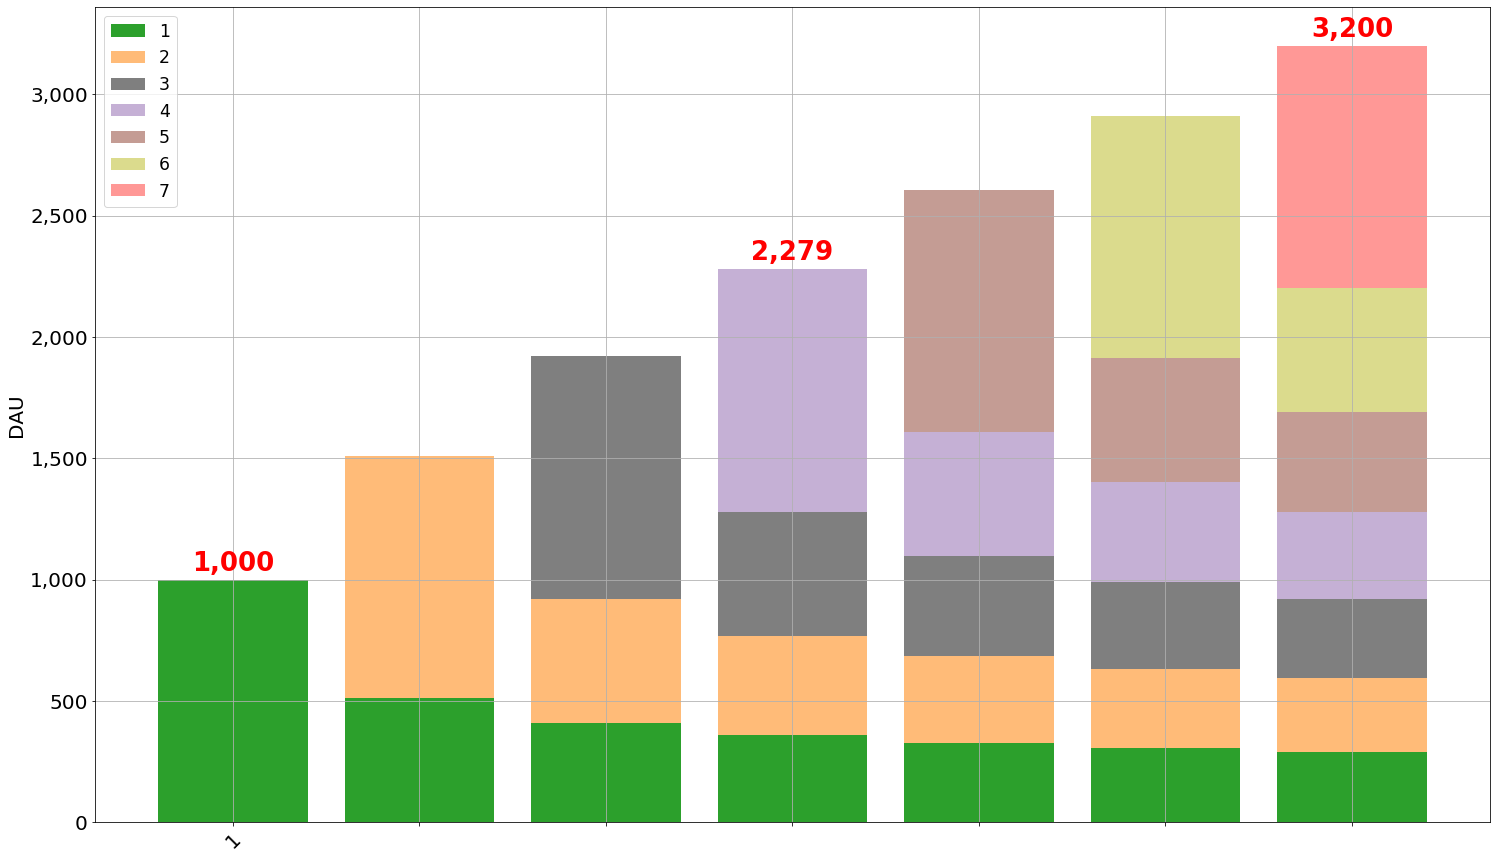

In [14]:
##############
# DAU STACKING EXAMPLE
##############

cohorts = [ 1000 ] * 7

DAU = th.project_cohorted_DAU( profile = general, periods = 7, cohorts = cohorts, start_date = 1 )

print( DAU )
print( "\n" )
total = DAU.sum()
print( total )

th.plot_forward_DAU_stacked( forward_DAU = DAU, 
    forward_DAU_labels = list( DAU.index ), 
    forward_DAU_dates = list( DAU.columns ), 
    show_totals_values=True
)

In [ ]:
##############
# MONETIZATION EXAMPLE
##############

ARPDAU = np.array( [ .5 ] * 7 )
total = np.array( total.tolist() )
x = np.arange( len( cohorts ) )

revenue = list( ARPDAU * total )

print( revenue )

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for i, v in enumerate( revenue ):
    ax.text( i - .25, v+25, "$" + str(v), color='red', fontweight='bold')
plt.bar( x, revenue )

In [ ]:
##############
# ROAS EXAMPLE - 7-day cohort
##############

cumulative_revenue = np.cumsum( revenue )
print( cumulative_revenue )

CAC = 1 #$1 cost of acquiring a user

#sum of the cohorts = number of users acquired in total
total_users_acquired = sum( cohorts )
#overall cost is CAC * sum of the cohorts
daily_ROAS = list( cumulative_revenue / ( CAC * total_users_acquired ) * 100 )

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for i, v in enumerate( [ round( a, 2 ) for a in daily_ROAS ] ):
    ax.text( i - .25, v+1, str(v) + "%", color='red', fontweight='bold')
plt.bar( x, daily_ROAS )

In [ ]:
##############
# ROAS EXAMPLE - single day cohort
##############

cohorts = [1000]

DAU = th.project_cohorted_DAU( profile = general, periods = 7, cohorts = cohorts, start_date = 1 )

cohort_DAU = np.array( DAU.sum() )
revenue = ARPDAU * cohort_DAU

print( cohort_DAU )

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for i, v in enumerate( revenue ):
    ax.text( i - .25, v+10, "$" + str(v), color='red', fontweight='bold')
plt.bar( x, revenue )


cumulative_revenue = np.cumsum( revenue )

daily_ROAS = list( cumulative_revenue / ( CAC * 1000 ) * 100 )

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for i, v in enumerate( [ round( a, 2 ) for a in daily_ROAS ] ):
    ax.text( i - .25, v+1, str(v) + "%", color='red', fontweight='bold')
plt.bar( x, daily_ROAS )

In [ ]:
##############
# Multi-day cohort broken out by daily cohort
##############

cohorts = [ 1000 ] * 7

DAU = th.project_cohorted_DAU( profile = general, periods = 7, cohorts = cohorts, start_date = 1 )

th.plot_forward_DAU_stacked( forward_DAU = DAU, 
    forward_DAU_labels = list( DAU.index ), 
    forward_DAU_dates = list( DAU.columns ),
    show_values=True, show_totals_values=True
)

In [ ]:
##############
# Multi-day cohort broken out by daily cohort
##############

def get_row_revenue( row ):
    return row * ARPDAU

revenue_by_cohort = DAU.apply( lambda row: get_row_revenue( row ) )

th.plot_forward_DAU_stacked( forward_DAU = revenue_by_cohort, 
    forward_DAU_labels = list( DAU.index ), 
    forward_DAU_dates = list( DAU.columns ),
    show_values=True
)

###

cumulative_revenue_by_cohort = revenue_by_cohort.cumsum(axis=1)

th.plot_forward_DAU_stacked( forward_DAU = cumulative_revenue_by_cohort, 
    forward_DAU_labels = list( DAU.index ), 
    forward_DAU_dates = list( DAU.columns ),
    show_values=True
)

###

ROAS_by_cohort = cumulative_revenue_by_cohort.apply( lambda row: round( row / 1000*100 ) )

th.plot_forward_DAU_stacked( forward_DAU = ROAS_by_cohort, 
    forward_DAU_labels = list( DAU.index ), 
    forward_DAU_dates = list( DAU.columns ),
    show_values=True
)






CAC: $1.094
D7 ROAS: 100.7435%
9 iterations



DAU by Day:
[1093 1651 2098 2491 2849 3182 3496]


<BarContainer object of 7 artists>

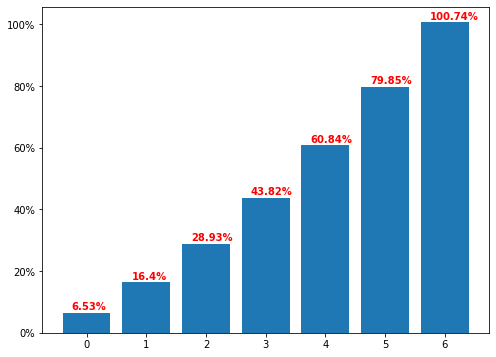

In [16]:
##############
# ROAS EXAMPLE - SIMULATION
##############

ARPDAU = np.array( [ .5 ] * 7 )
CAC = 1 #$1 cost of acquiring a user
count = 0 
d7_ROAS = 200 #HIGHER THAN 100
incremental_increase = .01
cohort_size = 1000

while abs(d7_ROAS / 100-1) > .01:
    CAC *= ( 1 + incremental_increase )
    cohort_size = round( cohort_size * ( 1 + incremental_increase ) )
    cohorts = [ cohort_size ] * 7

    DAU = th.project_cohorted_DAU( profile = general, periods = 7, cohorts = cohorts, start_date = 1 )

    total = DAU.sum()
    total = np.array( total.tolist() )
    x = np.arange( len( cohorts ) )
    revenue = list( ARPDAU * total )
    cumulative_revenue = np.cumsum( revenue )

    #sum of the cohorts = number of users acquired in total
    total_users_acquired = sum( cohorts )
    #overall cost is CAC * sum of the cohorts
    daily_ROAS = list( cumulative_revenue / ( CAC * total_users_acquired ) * 100 )
    d7_ROAS = daily_ROAS[ -1 ]
    count +=1 

print( "\n\n" )
print( "CAC: $" + str( round( CAC, 3 ) ) )
print( "D7 ROAS: " + str( round( d7_ROAS, 4 ) ) + "%" )
print( str( count ) + " iterations" )
print( "\n\n" )
print( "DAU by Day:" )
print( total )
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for i, v in enumerate( [ round( a, 2 ) for a in daily_ROAS ] ):
    ax.text( i - .25, v+1, str(v) + "%", color='red', fontweight='bold')
plt.bar( x, daily_ROAS )


In [ ]:
##############
# LTV CURVE EXAMPLE 
##############
months = 6

x = [ i for i in range( 6*30 ) ]
ltv = [ 1.2*math.log( y+1 ) for y in x ]

day_180_value = ltv[ -1 ]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.suptitle( "Example 180-day LTV Curve, Day 180 Value: $" + str( round( day_180_value, 2) ) )
plt.plot( ltv, linewidth=7 )

daily_monetization = []
for i, v in enumerate( ltv ):
    if i >= 1:
        daily_monetization.append( ltv[ i ] - ltv[ i-1 ] )

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.suptitle( "Daily Monetization for LTV Curve" )
plt.plot( daily_monetization, linewidth=7, color='red' )

In [ ]:
##############
# P&L EXAMPLE 
##############
timeline = 180
x = [ i for i in range( timeline+1 ) ]

def add_LTV_row( total, ltv, timeline ):
    #convert the LTV list into a df
    dm = daily_monetization( ltv )
    ltv_df = pd.DataFrame( dm ).T
    ltv_df.columns = [ str( a+1 ) for a in range( timeline ) ]

    total = total.append( ltv_df )
    total.rename( index={ 0:'LTV' },inplace=True )
    return total

def add_revenue_row( cohorts, ltv, timeline, total ):
    revenue = get_channel_revenue( cohorts, ltv, timeline )
    total = total.append( revenue )
    total.rename( index={ 0:'Revenue' },inplace=True )
    return total

def add_cost_row( CAC, cohorts, total, timeline ):
    cols = [ str( d+1 ) for d in range( timeline ) ]
    cost = [ CAC * c for c in cohorts ]
    cost = pd.DataFrame( cost ).T
    cost.columns = cols
    cost.name = 'Cost'
    total = total.append( cost )
    total.rename( index={ 0:'Cost' },inplace=True )
    return total

def add_cumulative_cost_row( total, timeline ):
    cost = total.loc[ 'Cost', ]
    cost = pd.DataFrame( cost ).T
    cost.columns = [ str( a+1 ) for a in range( timeline ) ]
    cost = cost.cumsum( axis=1 )
    cost.rename( index={ 'Cost':'cumulative_cost' },inplace=True )
    total = total.append( cost )
    total.rename( index={ 0:'cumulative_cost' },inplace=True )
    return total
    
def add_cumulative_revenue_row( total, timeline ):
    revenue = total.loc[ 'Revenue', ]
    revenue = pd.DataFrame( revenue ).T
    revenue.columns = [ str( a+1 ) for a in range( timeline ) ]
    revenue = revenue.cumsum( axis=1 )
    revenue.rename( index={ 'Revenue':'cumulative_revenue' },inplace=True )
    total = total.append( revenue )
    total.rename( index={ 0:'cumulative_revenue' },inplace=True )
    return total

def add_pnl_rows( total ):
    total.loc[ 'daily_pnl', ] = total.loc[ 'Revenue', ] - total.loc[ 'Cost', ]
    total.loc[ 'cumulative_pnl' ] = np.cumsum( total.loc[ 'daily_pnl', ] )
    return total

def daily_monetization( ltv ):
    daily_monetization = []
    for i, v in enumerate( ltv ):
        if i >= 1:
            daily_monetization.append( ltv[ i ] - ltv[ i-1 ] )
    return daily_monetization

def get_channel_revenue( cohorts, ltv, timeline ):
    cols = [ str( a+1 ) for a in range( timeline ) ]
    revenue = None
    cohort_count = 0
    daily_monetization_curve = daily_monetization( ltv )
    for c in cohorts:
        #dmv = daily monetization value, the amount of revenue from the LTV curve that
        #the user is contributing on that day
        cohort_revenue = [ c * dmv for dmv in daily_monetization_curve ]
        if cohort_count > 0:
            cohort_pad = [ 0 ] * cohort_count
            cohort_revenue = cohort_revenue[ : ( -1*cohort_count ) ]
            cohort_revenue = cohort_pad + cohort_revenue 
        #make a df out of the list
        cohort_revenue = pd.DataFrame( cohort_revenue ).T

        cohort_revenue.columns = cols

        if not isinstance( revenue, pd.DataFrame ) and revenue == None:
            revenue = cohort_revenue
        else:
            revenue = revenue.append( cohort_revenue )
        cohort_count+=1

    revenue = pd.DataFrame( revenue.sum() ).T
    return revenue

def get_channel_cost( CAC, cohorts, timeline ):
    cols = [ str( a+1 ) for a in range( timeline ) ]
    costs = None
    cohort_count = 0
    for c in cohorts:
        cohort_revenue = [ c * CAC for d in range( timeline ) ]
        if cohort_count > 0:
            cohort_pad = [ 0 ] * cohort_count
            cohort_revenue = cohort_revenue[ : ( -1*cohort_count ) ]
            cohort_revenue = cohort_pad + cohort_revenue 
        #make a df out of the list
        cohort_revenue = pd.DataFrame( cohort_revenue ).T

        cohort_revenue.columns = cols

        if not isinstance( revenue, pd.DataFrame ) and revenue == None:
            revenue = cohort_revenue
        else:
            revenue = revenue.append( cohort_revenue )
        cohort_count+=1

    revenue = pd.DataFrame( revenue.sum() ).T
    return revenue

def plot_ltv_vs_cac( ltv, cac, name ):
    x = [ i+1 for i,v in enumerate( ltv[ 1: ] ) ]
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    fmt = '${x:,.2f}'
    tick = mtick.StrMethodFormatter(fmt)
    ax.yaxis.set_major_formatter(tick)
    plt.suptitle( "LTV Curve for " + name )
    plt.xticks(np.arange(len(x)), np.arange(1, len(x)+1))
    [ l.set_visible( False ) for ( i, l ) in enumerate( ax.xaxis.get_ticklabels() ) if i % 10 != 0 ]
    plt.axhline(y=cac, color='red', linestyle='--')
    plt.plot( x, ltv[1:], linewidth=7, color='green' )

facebook = th.create_profile( days = [1,7,30,90,180], retention_values = [60, 40, 20, 10, 5] )
google = th.create_profile( days = [1,7,30,90,180], retention_values = [50, 30, 20, 15, 12] )
pinterest = th.create_profile( days = [1,7,30,90,180], retention_values = [65, 40, 28, 20, 15] )

facebook_CAC = 4
google_CAC = 3
pinterest_CAC = 2

facebook_cohorts = [ 2000 ] * timeline
google_cohorts = [ 1800 ] * timeline
pinterest_cohorts = [ 800 ] * timeline
viral_users = .01*(2000*1800*800)

facebook_ltv = [ .866*math.log( y+1 ) for y in x ]
google_ltv = [ .616*math.log( y+1 ) for y in x ]
pinterest_ltv = [ .579*math.log( y+1 ) for y in x ]

facebook_DAU = th.project_cohorted_DAU( profile = facebook, periods = timeline, 
                    cohorts = facebook_cohorts, start_date = 1 )

google_DAU = th.project_cohorted_DAU( profile = google, periods = timeline, 
                    cohorts = google_cohorts, start_date = 1 )

pinterest_DAU = th.project_cohorted_DAU( profile = pinterest, periods = timeline, 
                    cohorts = pinterest_cohorts, start_date = 1 )

facebook_total = th.DAU_total( facebook_DAU )
facebook_total = add_LTV_row( facebook_total, facebook_ltv, timeline )
facebook_total = add_revenue_row( facebook_cohorts, facebook_ltv, timeline, facebook_total )
facebook_total = add_cost_row( facebook_CAC, facebook_cohorts, facebook_total, timeline )
facebook_total = add_cumulative_cost_row( facebook_total, timeline )
facebook_total = add_cumulative_revenue_row( facebook_total, timeline )
facebook_total = add_pnl_rows( facebook_total )
#
google_total = th.DAU_total( google_DAU )
google_total = add_LTV_row( google_total, google_ltv, timeline )
google_total = add_revenue_row( google_cohorts, google_ltv, timeline, google_total )
google_total = add_cost_row( google_CAC, google_cohorts, google_total, timeline )
google_total = add_cumulative_cost_row( google_total, timeline )
google_total = add_cumulative_revenue_row( google_total, timeline )
google_total = add_pnl_rows( google_total )
#
pinterest_total = th.DAU_total( pinterest_DAU )
pinterest_total = add_LTV_row( pinterest_total, pinterest_ltv, timeline )
pinterest_total = add_revenue_row( pinterest_cohorts, pinterest_ltv, timeline, pinterest_total )
pinterest_total = add_cost_row( pinterest_CAC, pinterest_cohorts, pinterest_total, timeline )
pinterest_total = add_cumulative_cost_row( pinterest_total, timeline )
pinterest_total = add_cumulative_revenue_row( pinterest_total, timeline )
pinterest_total = add_pnl_rows( pinterest_total )
#

print( "FACEBOOK\n" )
print( facebook_total )

print( "GOOGLE\n" )
print( google_total )

print( "PINTEREST\n" )
print( pinterest_total )




In [ ]:
###############
### PLOT LTVs vs CACs
###############
plot_ltv_vs_cac( facebook_ltv, facebook_CAC, "Facebook" )
plot_ltv_vs_cac( google_ltv, google_CAC, "Google" )
plot_ltv_vs_cac( pinterest_ltv, pinterest_CAC, "Pinterest" )

In [19]:
###############
### COMBINE THE TOTAL DFs
###############

rows = [ 'DAU', 'Revenue', 'Cost', 'cumulative_cost', 'cumulative_revenue', 'daily_pnl', 'cumulative_pnl' ]
total = facebook_total.loc[ rows, ].add( google_total.loc[ rows, ] )
total = total.add( pinterest_total.loc[ rows, ] )
total.loc[ 'cumulative_revenue', ] = total.loc[ 'cumulative_revenue', ].apply( lambda val: int( val ) )

x = [ i+1 for i,v in enumerate( [ int( d ) for d in total.columns.tolist() ] ) ]

#COST VS REVENUE

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.suptitle( "Revenue Schedule" )
plt.xticks(np.arange(len(x)), np.arange(1, len(x)+1))
[ l.set_visible( False ) for ( i, l ) in enumerate( ax.xaxis.get_ticklabels() ) if i % 10 != 0 ]
plt.axhline(y=0, color='red', linestyle='--')
ax.plot( x, total.loc[ 'Revenue', ], linewidth=5, color='green', label="Revenue" )
ax.plot( x, [ -1*c for c in total.loc[ 'Cost', ] ], linewidth=5, color='red', label="Cost" )
ax.legend()

#CUMULATIVE VALUES

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
fmt = '${x:,.2f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
plt.suptitle( "Revenue Schedule" )
plt.xticks(np.arange(len(x)), np.arange(1, len(x)+1))
[ l.set_visible( False ) for ( i, l ) in enumerate( ax.xaxis.get_ticklabels() ) if i % 10 != 0 ]
plt.axhline(y=0, color='red', linestyle='--')
ax.plot( x, total.loc[ 'cumulative_revenue', ], linewidth=5, color='mediumaquamarine', label="Cumulative Revenue" )
ax.plot( x, [ -1*c for c in total.loc[ 'cumulative_cost', ] ], linewidth=5, color='salmon', label="Cumulative Cost" )
ax.plot( x, [ c for c in total.loc[ 'cumulative_pnl', ] ], linewidth=5, color='firebrick', label="Cumulative P&L" )
ax.legend()

print( "Cumulative Loss at Day " + str( timeline ) + ": $" + str( total.loc[ 'cumulative_pnl', ][ -1 ] ) )
print( total.iloc[ :, -1 ] )



NameError: name 'facebook_total' is not defined